# Constructing the astronomy data set

This notebook constructs the chemical abundances data set for the application of the constrained denoisings methods to the astronomy. The data are taken from the APOGEE data set.

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
np.random.seed(321)
nsub = 2000

X = np.load('X_chem.pkl', allow_pickle=True) 
prec = np.load('chem_prec.pkl', allow_pickle=True) 
abunds = ['MG_FE', 'FE_H', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 
          'AL_FE', 'CA_FE', 'TI_FE', 'SI_FE', 'P_FE', 'S_FE', 
          'K_FE', 'TIII_FE', 'V_FE', 'CR_FE', 'MN_FE', 'CO_FE', 'NI_FE']
n, d = X.shape
inds = [i for i in range(d) if abunds[i] in ['O_FE','N_FE']]
X = X[:, inds]
prec = prec[:, inds]
rand_ind = np.random.choice(range(X.shape[0]), nsub)


chemicals_dict = {'O_FE_val': X[rand_ind,0], 'N_FE_val':X[rand_ind,1],
                  'O_FE_prec':prec[rand_ind,0], 'N_FE_prec':prec[rand_ind,1]}
chemicals = pd.DataFrame.from_dict(data=chemicals_dict)
chemicals

,O_FE_val,N_FE_val,O_FE_prec,N_FE_prec
0,0.325537,-0.008926,285.394775,748.162964
1,0.332795,0.067611,167.249359,411.257019
2,0.289167,0.178170,185.307648,496.124847
3,0.335026,-0.075908,230.855621,436.105286
4,0.158819,-0.052417,232.461884,477.688843
...,...,...,...,...
1995,0.256959,0.072567,180.981567,351.372498
1996,0.172650,0.182612,252.910034,682.914795
1997,0.319162,-0.013716,349.528473,952.185364
1998,0.140728,0.243737,350.282776,827.997986


As a sanity check, let's visualize the data with a scatterplot.

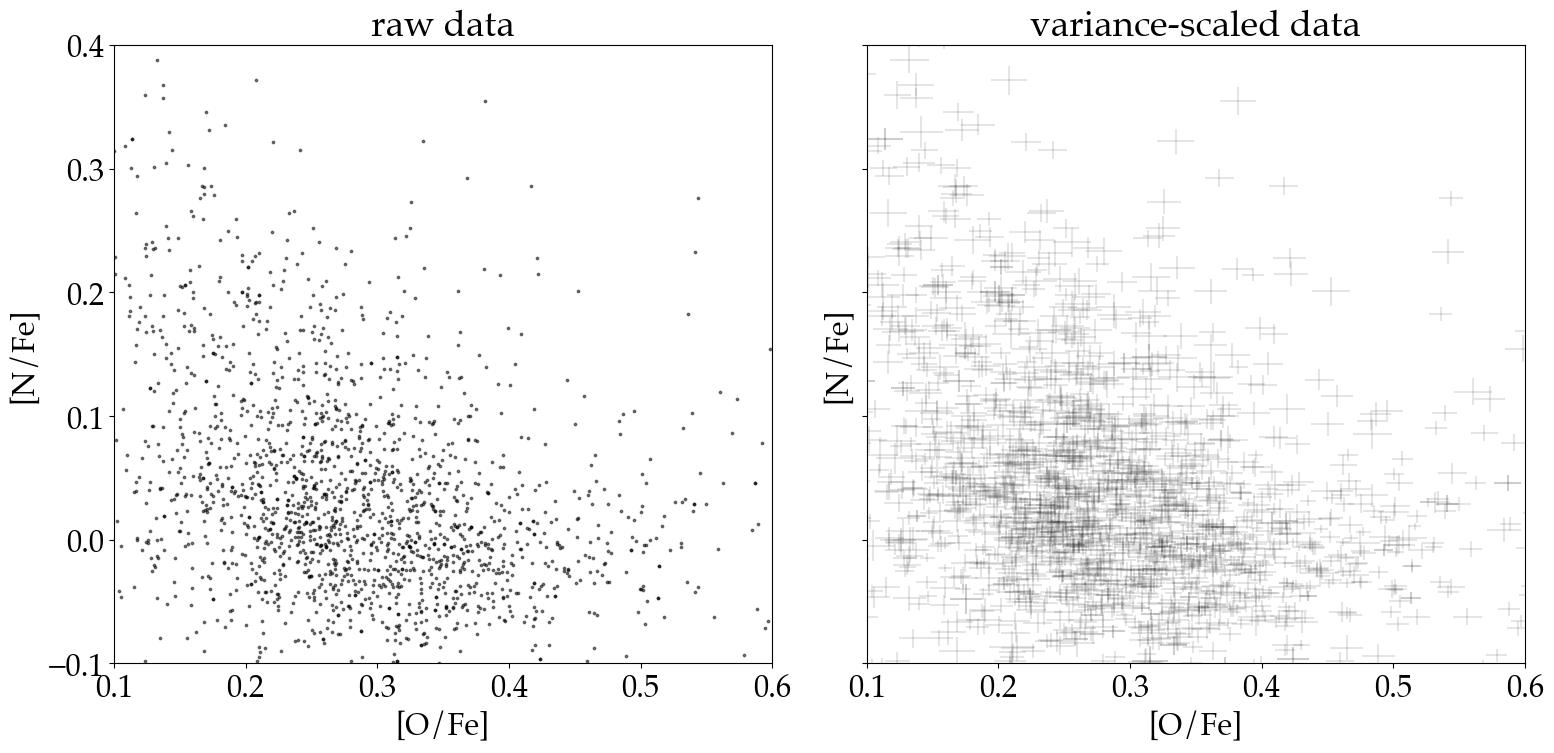

In [3]:
plt.rcParams.update({'font.size': 22,
                    'mathtext.fontset': 'stix',
                    'font.family': 'serif',
                    'font.serif':'Palatino'})

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16,8))

ax[0].set_title('raw data')
ax[0].set_ylabel('[N/Fe]')
ax[0].set_xlabel('[O/Fe]')
ax[0].scatter(chemicals['O_FE_val'],chemicals['N_FE_val'], alpha=0.5, s=3, color='black')

ax[1].set_title('variance-scaled data')
ax[1].set_ylabel('[N/Fe]')
ax[1].set_xlabel('[O/Fe]')
ax[1].scatter(chemicals['O_FE_val'],chemicals['N_FE_val'], alpha=0.1, marker='|',
              s=1e5/chemicals['N_FE_prec'], color='black')
ax[1].scatter(chemicals['O_FE_val'],chemicals['N_FE_val'], alpha=0.1, marker='_',
              s=1e5/chemicals['O_FE_prec'], color='black')


xmin, xmax = 0.1, 0.6,
ymin, ymax = -0.1, 0.4
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
#plt.savefig('fig_1_2.pdf')
plt.tight_layout()

Now save the data to an external pickle file.

In [4]:
chemicals.to_pickle("./astronomy_data.pkl")  